Introduction to Matplotlib
Get straight into plotting data, that's what we're focused on.

Video 0 will be concepts and contain details like anatomy of a figure. The rest of the videos will be pure code based.

Concepts in Matplotlib
2 ways of creating plots (pyplot & OO) - use the OO method
Plotting data (NumPy arrays), line, scatter, bar, hist, subplots
Plotting data directly with Pandas (using the pandas matplotlib wrapper)
Plotting data (pandas DataFrames) with the OO method, line, scatter, bar, hist, subplots
Cutomizing your plots, limits, colors, styles, legends
Saving plots

# Concepts in Matplotlib

    * What is Matplotlib?
    * Why Matplotlib?
    * Anatomy of a figure
    * Where does Matplotlib fit into the ecosystem?
    * A Matplotlib workflow

## 2 ways of creating plots
    pyplot()
    OO - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
    Matplotlib recommends the OO API
    https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
    https://matplotlib.org/3.1.1/tutorials/introductory/lifecycle.html
    Start by importing Matplotlib and setting up the %matplotlib inline magic command.

In [1]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt

[]

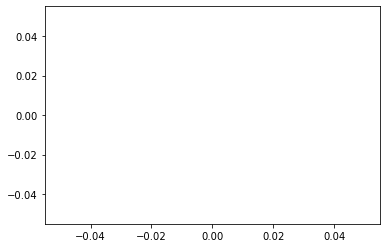

In [2]:
# Create a simple plot, without the semi-colon
plt.plot()

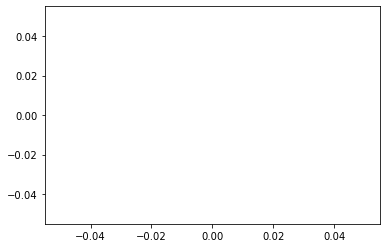

In [3]:
# With the semi-colon
plt.plot();

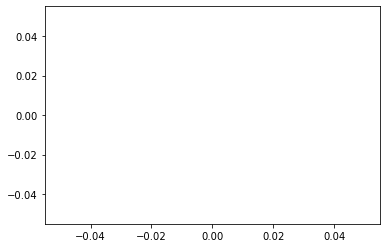

In [5]:
# You could use plt.show() if you want
plt.plot()
plt.show()

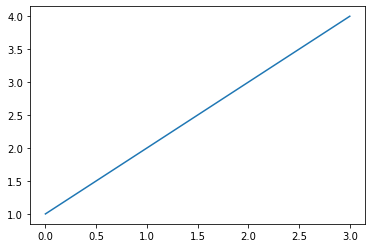

In [6]:
# Let's add some data
plt.plot([1, 2, 3, 4])

In [7]:
# Create some data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

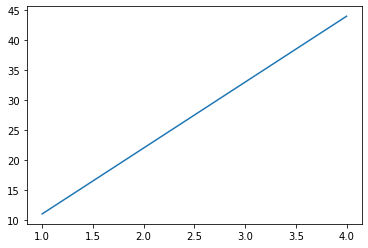

In [8]:
# With a semi-colon and now a y value
plt.plot(x, y);

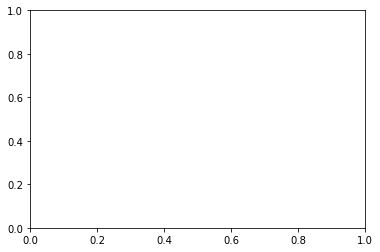

In [17]:
# Creating a plot with the OO verison, confusing way first
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

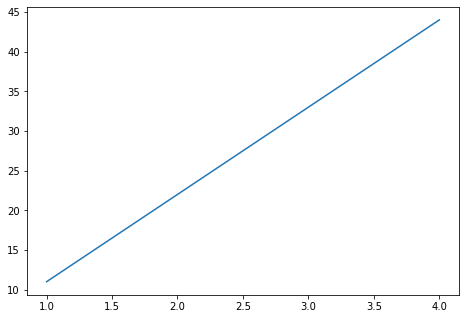

In [10]:
# Confusing #2
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

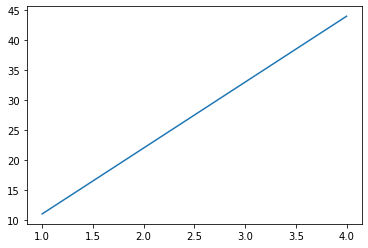

In [11]:
# Easier and more robust going forward (what we're going to use)
fig, ax = plt.subplots()
ax.plot(x, y);

In [12]:
# This is where the object orientated name comes from 
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

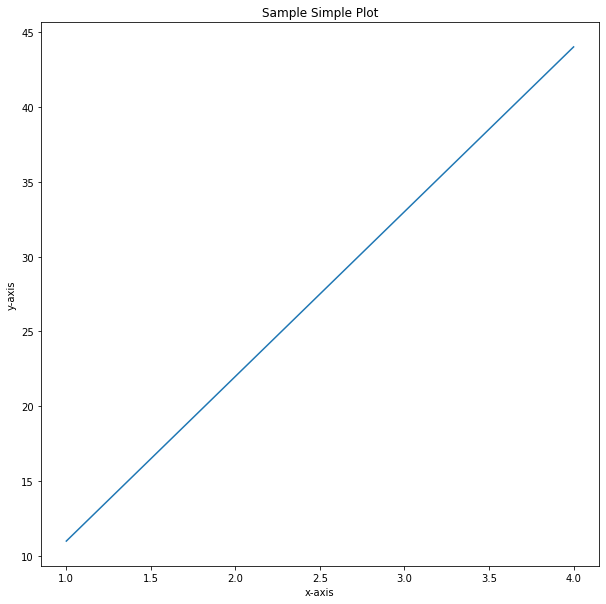

In [16]:

# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")

# 5. Save & show
fig.savefig("simple-plot.png")

# Making the most common type of plots using NumPy arrays

    Most of figuring out what kind of plot to use is getting a feel for the data, then see what suits it best.
    Matplotlib visualizations are built off NumPy arrays. So in this section we'll build some of the most common types of plots using NumPy arrays.

        line
        scatter
        bar
        hist
        subplots()
    To make sure we have access to NumPy, we'll import it as np.

In [20]:
import numpy as np

## Line
Line is the default type of visualization in Matplotlib. Usually, unless specified otherwise, your plots will start out as lines.

In [21]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

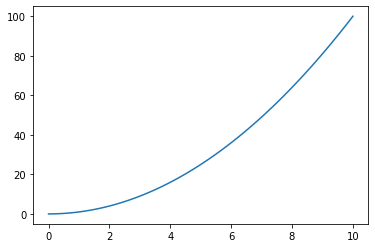

In [22]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

## Scatte

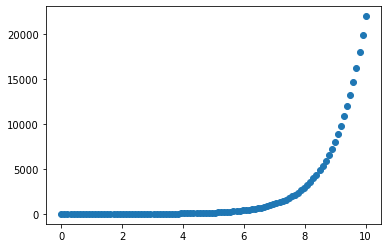

In [23]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

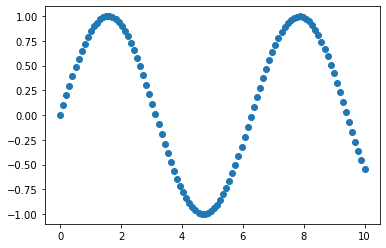

In [24]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

### Bar
    Vertical
    Horizontal

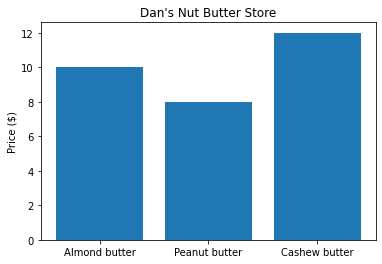

In [25]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)");

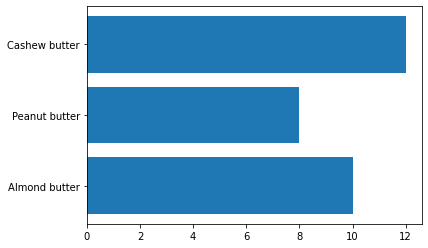

In [27]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

### Histogram (hist)
    Could show image of normal distribution here

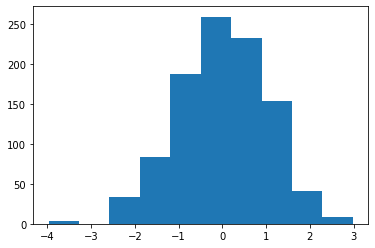

In [28]:
# Make some data from a normal distribution
x = np.random.randn(1000) # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

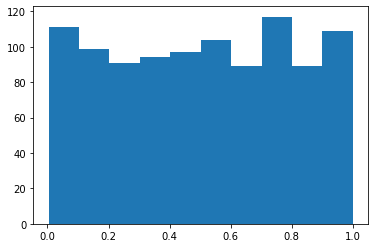

In [29]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

### Subplots

    Multiple plots on one figure https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

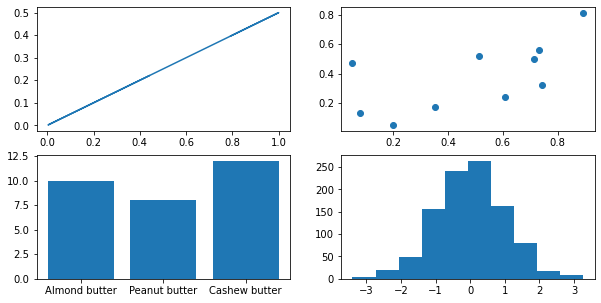

In [31]:
# Option 1: Create multiple subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));